In [2]:
from google.colab import files
files.upload()  # Upload your kaggle.json her


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dhanacse","key":"dd8258ac3cfced50e9860b05c4d73757"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d hariharanalm/river-vs-lake
!unzip river-vs-lake.zip -d river-vs-lake

Dataset URL: https://www.kaggle.com/datasets/hariharanalm/river-vs-lake
License(s): apache-2.0
 75% 115M/154M [00:00<00:00, 1.21GB/s]
100% 154M/154M [00:00<00:00, 1.04GB/s]
Archive:  river-vs-lake.zip
  inflating: river-vs-lake/River vs Lake/lake water/Image_1.jpg  
  inflating: river-vs-lake/River vs Lake/lake water/Image_10.jpg  
  inflating: river-vs-lake/River vs Lake/lake water/Image_100.jpg  
  inflating: river-vs-lake/River vs Lake/lake water/Image_11.jpg  
  inflating: river-vs-lake/River vs Lake/lake water/Image_12.jpeg  
  inflating: river-vs-lake/River vs Lake/lake water/Image_13.jpg  
  inflating: river-vs-lake/River vs Lake/lake water/Image_14.jpg  
  inflating: river-vs-lake/River vs Lake/lake water/Image_15.jpg  
  inflating: river-vs-lake/River vs Lake/lake water/Image_16.jpg  
  inflating: river-vs-lake/River vs Lake/lake water/Image_17.jpg  
  inflating: river-vs-lake/River vs Lake/lake water/Image_18.jpg  
  inflating: river-vs-lake/River vs Lake/lake water/Image_19.

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
IMG_SIZE = 224
BATCH_SIZE = 32

In [8]:
# creating training data parameters!
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

#creating training data with the above parameters and applying transformation
# folder = parameters.flow_from_directory(path,ts,bs,cm,subset)

train_generator = train_datagen.flow_from_directory(
    '/content/river-vs-lake/River vs Lake',
    target_size = (IMG_SIZE,IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'binary',
    subset = 'training'
)

Found 153 images belonging to 2 classes.


In [9]:
val_generator = train_datagen.flow_from_directory(
    '/content/river-vs-lake/River vs Lake',
    target_size = (IMG_SIZE,IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'binary',
    subset = 'validation'
)

Found 37 images belonging to 2 classes.


In [10]:
model = keras.Sequential([
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(train_generator, epochs = 3, validation_data = val_generator, batch_size = BATCH_SIZE)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 28s 5s/step - accuracy: 0.4772 - loss: 1.3332 - val_accuracy: 0.5135 - val_loss: 0.7396
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.5182 - loss: 0.7140 - val_accuracy: 0.5946 - val_loss: 0.6788
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.6281 - loss: 0.6641 - val_accuracy: 0.7027 - val_loss: 0.6198


In [13]:
model.save('/content/river-vs-lake/River vs Lake/river.h5')

In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model = load_model('/content/river-vs-lake/River vs Lake/river.h5')

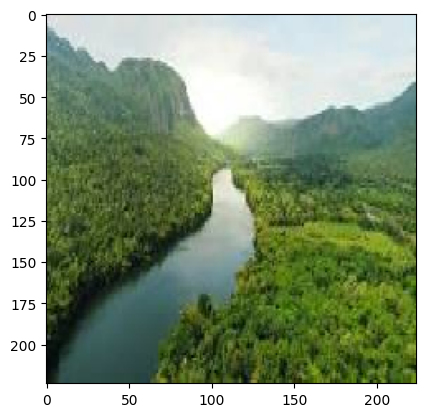

In [15]:
test_image_path = "/content/f1.png"
img = image.load_img(test_image_path, target_size = (224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [16]:
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis = 0)
img_array /= 255.

prediction = model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
[[0.441706]]


In [17]:
if prediction < 0.5:
  print("River")
else:
  print("Lake")

River
